In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-genre-classification/movie_genre_classification_final.csv


Exploring the Dataset

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [31]:
# Column names
print("Columns:", df.columns.tolist())

# First few rows
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Columns: ['Title', 'Year', 'Director', 'Duration', 'Rating', 'Votes', 'Description', 'Language', 'Country', 'Budget_USD', 'BoxOffice_USD', 'Genre', 'Production_Company', 'Content_Rating', 'Lead_Actor', 'Num_Awards', 'Critic_Reviews', 'plot_length', 'genre_encoded']
             Title  Year  Director  Duration  Rating   Votes  \
0  Winds of Fate 4  1980    R. Lee       167     4.1  182425   
1     Firestorm 11  2014   S. Chen       166     4.1  449351   
2    Silent Echo 2  2016   A. Khan       170     4.1  363328   
3    City Lights 4  1982  L. Zhang       170     9.9   62371   
4   Broken Truth 1  1990  L. Zhang        91     5.3    4600   

                                         Description  Language Country  \
0   A touching love story with heartwarming moments.   Spanish   China   
1  A fast-paced thriller with intense action scenes.    Korean   China   
2  A fast-paced thriller with intense action scenes.    Korean   Japan   
3  An emotional journey exploring complex charact... 

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file path

In [13]:
file_path = "/kaggle/input/movie-genre-classification/movie_genre_classification_final.csv"

Load and inspecting the dataset

In [14]:
df = pd.read_csv("/kaggle/input/movie-genre-classification/movie_genre_classification_final.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

#previewing data
print(df.head())

Shape: (50000, 17)
Columns: ['Title', 'Year', 'Director', 'Duration', 'Rating', 'Votes', 'Description', 'Language', 'Country', 'Budget_USD', 'BoxOffice_USD', 'Genre', 'Production_Company', 'Content_Rating', 'Lead_Actor', 'Num_Awards', 'Critic_Reviews']
             Title  Year  Director  Duration  Rating   Votes  \
0  Winds of Fate 4  1980    R. Lee       167     4.1  182425   
1     Firestorm 11  2014   S. Chen       166     4.1  449351   
2    Silent Echo 2  2016   A. Khan       170     4.1  363328   
3    City Lights 4  1982  L. Zhang       170     9.9   62371   
4   Broken Truth 1  1990  L. Zhang        91     5.3    4600   

                                         Description  Language Country  \
0   A touching love story with heartwarming moments.   Spanish   China   
1  A fast-paced thriller with intense action scenes.    Korean   China   
2  A fast-paced thriller with intense action scenes.    Korean   Japan   
3  An emotional journey exploring complex charact...  Japanese   J

Exploring the dataset

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

# Checking for missing values

In [16]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64


In [17]:
#unique genres
print("Unique genres:", df['Genre'].unique())

#distribution of genres
print("Genre counts:\n", df['Genre'].value_counts())

Unique genres: ['Romance' 'Action' 'Drama' 'Fantasy' 'Comedy' 'Thriller' 'Horror']
Genre counts:
 Genre
Horror      7260
Drama       7187
Romance     7169
Thriller    7118
Action      7107
Fantasy     7100
Comedy      7059
Name: count, dtype: int64


In [22]:
print(df.columns.tolist())

['Title', 'Year', 'Director', 'Duration', 'Rating', 'Votes', 'Description', 'Language', 'Country', 'Budget_USD', 'BoxOffice_USD', 'Genre', 'Production_Company', 'Content_Rating', 'Lead_Actor', 'Num_Awards', 'Critic_Reviews']


Plot length analysis

In [23]:
# Basic text length
df['plot_length'] = df['Description'].apply(lambda x: len(str(x).split()))

# Average plot length per genre
print(df.groupby('Genre')['plot_length'].mean())

Genre
Action      7.0
Comedy      6.0
Drama       6.0
Fantasy     8.0
Horror      8.0
Romance     7.0
Thriller    7.0
Name: plot_length, dtype: float64


# Build a genre classification model

## preparing data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode genres as numbers
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['Genre'])

# Train-test split
X = df['Description'].astype(str)
y = df['genre_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### TF-IDF + Naive Bayes Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', MultinomialNB())
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Action       1.00      1.00      1.00      1399
      Comedy       1.00      1.00      1.00      1447
       Drama       1.00      1.00      1.00      1448
     Fantasy       1.00      1.00      1.00      1430
      Horror       1.00      1.00      1.00      1485
     Romance       1.00      1.00      1.00      1429
    Thriller       1.00      1.00      1.00      1362

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# Visualise resutls

## Plot genre distribution

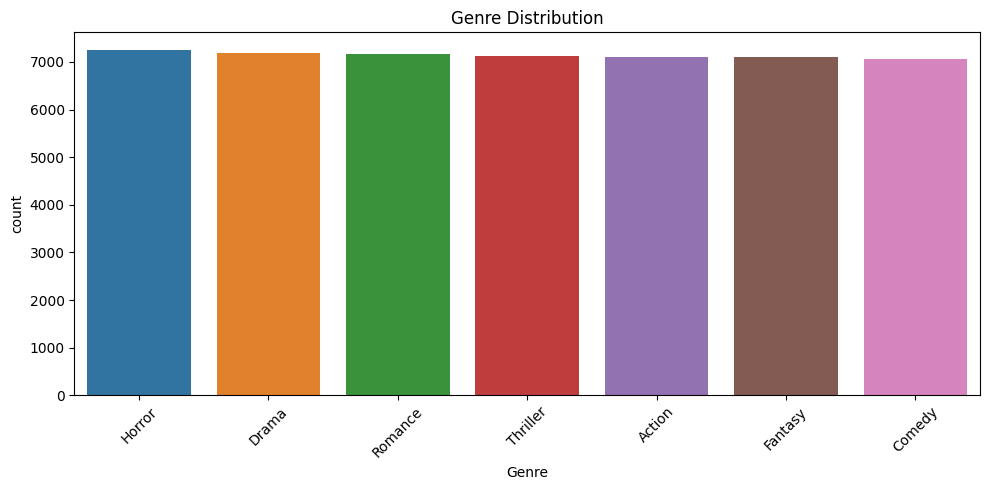

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Coufusion matrix

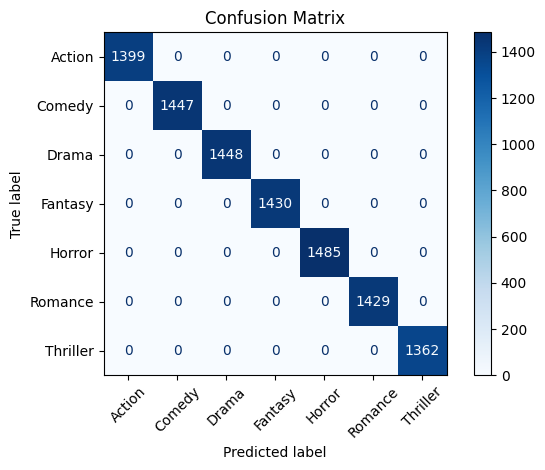

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# Use Logistic Regression

Replace model pipeline

In [29]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', LogisticRegression(max_iter=1000))  # You can tune C and penalty
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Action       1.00      1.00      1.00      1399
      Comedy       1.00      1.00      1.00      1447
       Drama       1.00      1.00      1.00      1448
     Fantasy       1.00      1.00      1.00      1430
      Horror       1.00      1.00      1.00      1485
     Romance       1.00      1.00      1.00      1429
    Thriller       1.00      1.00      1.00      1362

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

